### Mesh deformation
If we want to deform a triangle mesh according to a small number of constraints. we can use mesh deformation algorithms. Open3D implements the as-rigid-as-possible method by \[[SorkineAndAlexa2007](http://www.open3d.org/docs/release/tutorial/reference.html#SorkineAndAlexa2007)\] that optimizes the following energy function
$$\sum_i \sum_{j\in N(i)} w_{ij} \lVert (p'_i - p'_j) - R_i (p_i - p_j) \rVert ^2 $$ 
where $\mathbf{R}_i$ are the rotation matrices that we want to optimize for, and $\mathbf{p}_i$ and $\mathbf{p}_i'$ are the vertex positions before and after the optimization, respectively.  $\ \mathcal{N(i)}$ is the set of neighbors of vertex $\mathit{i}$. The weights $w_{ij}$ are cotangent weights.

Open3D implements this method in ***deform_as_rigid_as_possible***. The first argument to this method is a set of ***constraint_ids*** that refer to the vertices in the triangle mesh. The second argument ***constrint_pos*** defines at which position those vertices should be after the optimization. The optimization process is an iterative scheme. Hence, we also can define the number of iterations via ***max_iter***.

In [1]:
import open3d as o3d 
import numpy as np 
import matplotlib.pyplot as plt 
import copy
import Open3D.examples.python.open3d_tutorial as o3dtut

[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\raycast_vtx_004.npy already exists, skipped.
[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\normal_map.npy already exists, skipped.
[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\tests\cube.obj already exists, skipped.
[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\vertex_map.npy already exists, skipped.


In [2]:
mesh = o3dtut.get_armadillo_mesh()
vertices = np.asarray(mesh.vertices)
static_ids = [idx for idx in np.where(vertices[:, 1] < -30)[0]]
static_pos = []
for id in static_ids:
    static_pos.append(vertices[id])
handle_ids = [2490]
handle_pos = [vertices[2490] + np.array((-40, -40, -40))]
constraint_ids = o3d.utility.IntVector(static_ids + handle_ids)
constraint_pos = o3d.utility.Vector3dVector(static_pos + handle_pos)

with o3d.utility.VerbosityContextManager(o3d.utility.VerbosityLevel.Debug) as cm:
    mesh_prime = mesh.deform_as_rigid_as_possible(constraint_ids, constraint_pos, max_iter=50)

[Open3D DEBUG] [DeformAsRigidAsPossible] setting up S'
[Open3D DEBUG] [DeformAsRigidAsPossible] done setting up S'
[Open3D DEBUG] [DeformAsRigidAsPossible] setting up system matrix L
[Open3D DEBUG] [DeformAsRigidAsPossible] done setting up system matrix L
[Open3D DEBUG] [DeformAsRigidAsPossible] setting up sparse solver
[Open3D DEBUG] [DeformAsRigidAsPossible] done setting up sparse solver
[Open3D DEBUG] [DeformAsRigidAsPossible] iter=0, energy=4.199704e+03
[Open3D DEBUG] [DeformAsRigidAsPossible] iter=1, energy=1.902613e+03
[Open3D DEBUG] [DeformAsRigidAsPossible] iter=2, energy=1.315890e+03
[Open3D DEBUG] [DeformAsRigidAsPossible] iter=3, energy=1.004800e+03
[Open3D DEBUG] [DeformAsRigidAsPossible] iter=4, energy=8.093276e+02
[Open3D DEBUG] [DeformAsRigidAsPossible] iter=5, energy=6.758837e+02
[Open3D DEBUG] [DeformAsRigidAsPossible] iter=6, energy=5.799615e+02
[Open3D DEBUG] [DeformAsRigidAsPossible] iter=7, energy=5.084362e+02
[Open3D DEBUG] [DeformAsRigidAsPossible] iter=8, energy

Original Mesh


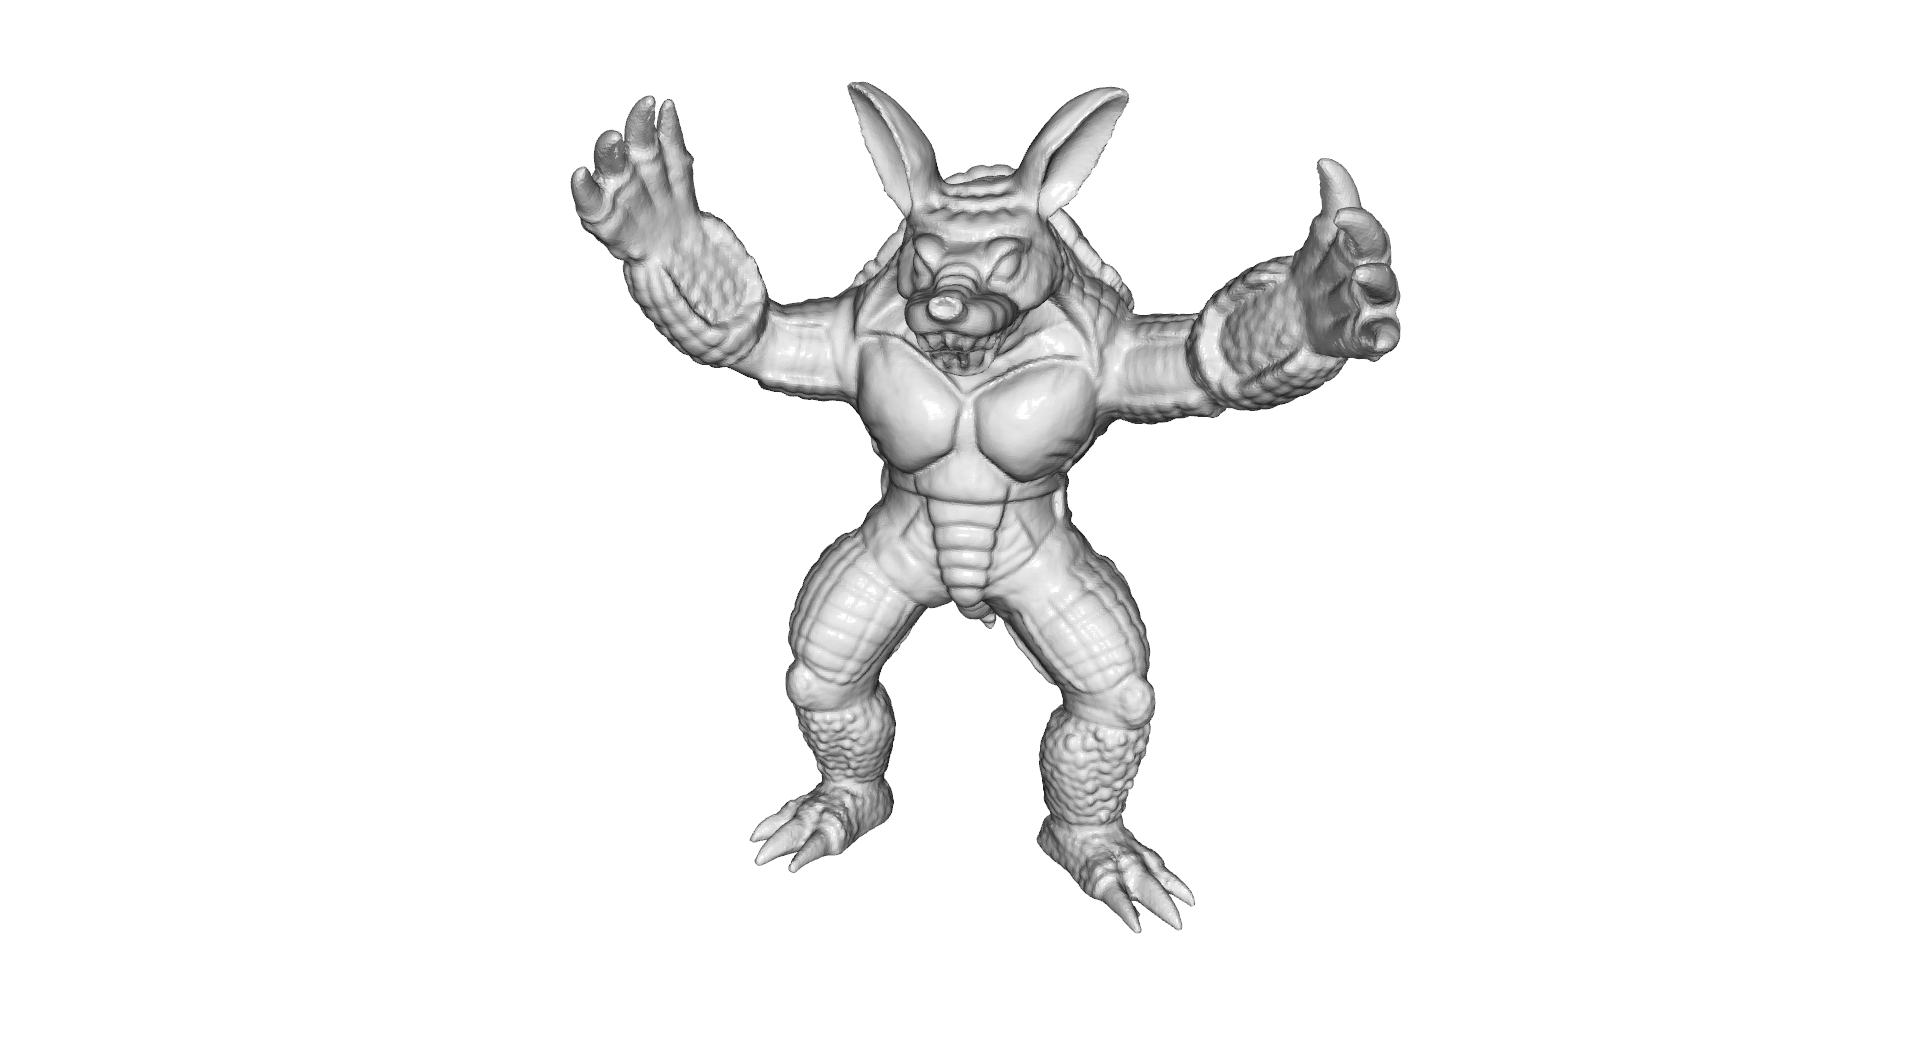

Deformed Mesh


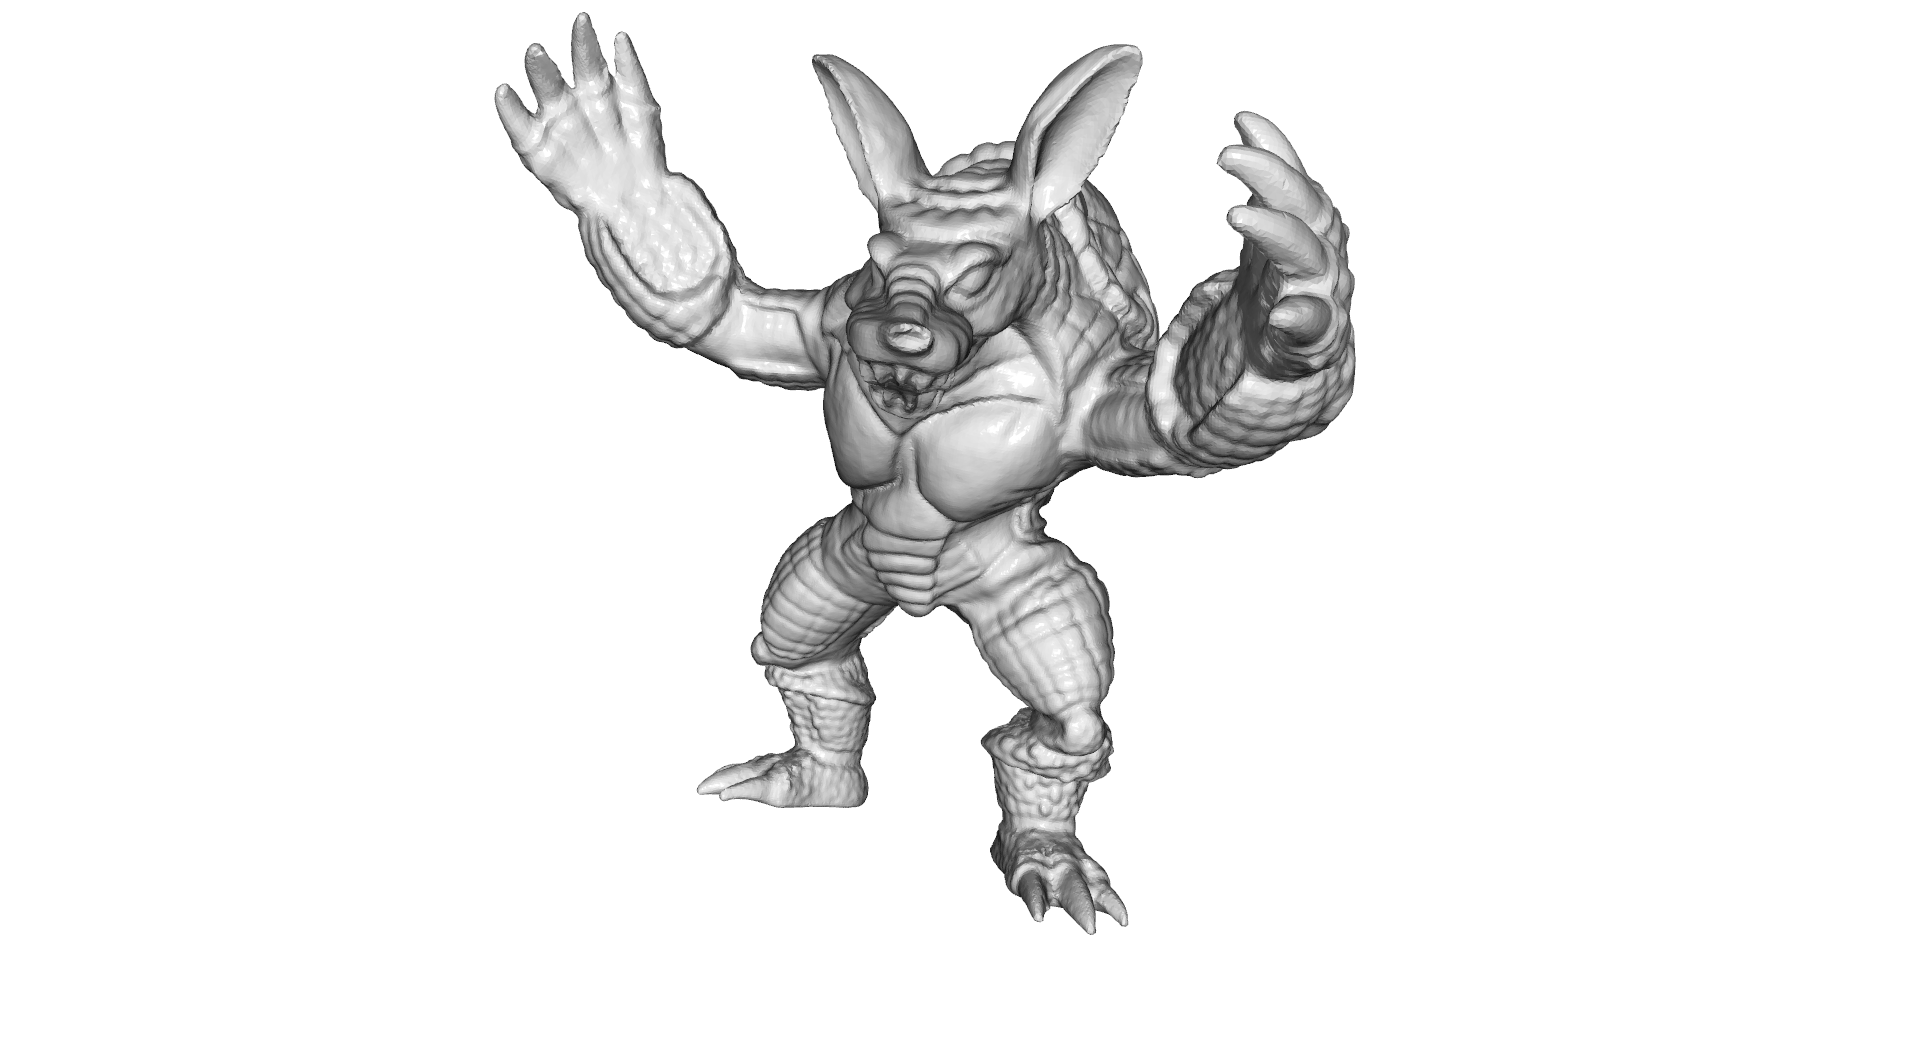

In [3]:
print('Original Mesh')
R = mesh.get_rotation_matrix_from_xyz((0, np.pi, 0))
o3d.visualization.draw_geometries([mesh.rotate(R, center=mesh.get_center())])
print('Deformed Mesh')
mesh_prime.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_prime.rotate(R, center=mesh_prime.get_center())])

In [15]:
mesh = o3dtut.get_armadillo_mesh()
vertices = np.asarray(mesh.vertices)
print('len(vertices)', len(vertices))
print(vertices.shape)
print(vertices[0])
print(np.where(vertices[:, 1] < -30)[0])
print(np.where(vertices[:, 1] < -30))
print(len(np.where(vertices[:, 1] < -30)))
# print(vertices[np.where(vertices[:, 1] < - 30)])
# static_ids = [idx for idx in np.where(vertices[:, 1] < -30)[0]]

len(vertices) 172974
(172974, 3)
[ 5.8945775  11.78840065 27.28323936]
[     3      8      9 ... 172961 172968 172972]
(array([     3,      8,      9, ..., 172961, 172968, 172972], dtype=int64),)
1


#### Smoothed ARAP
Open3D also implements a smoothed version of the ARAP objective defined as
$$\sum_i \sum_{j\in \mathcal{N(i)}} w_{ij} \lVert (\mathbf{p'}_i - \mathbf{p'}_j) - \mathbf{R}_i(\mathbf{p}_i - \mathbf{p}_j)\rVert^2 + \alpha A\lVert \mathbf{R}_i - \mathbf{R}_j\rVert^2$$
that penalizes a deviation of neighboring rotation matrices. $\alpha$ is a trade-off parameter for the regularization term and $A$ is the surface area.

The smoothed objective can be used in ***deform_as_rigid_as_possible*** by using the argument ***energy*** with the parameter ***Smoothed***.